## 作業
1. 請用 numpy 建立一個 10 x 10, 數值分布自 -1.0 ~ 1.0 的矩陣並繪製 Heatmap
2. 請用 numpy 建立一個 1000 x 3, 數值分布為 -1.0 ~ 1.0 的矩陣，並繪製 PairPlot (上半部為 scatter, 對角線為 hist, 下半部為 density)
3. 請用 numpy 建立一個 1000 x 3, 數值分布為常態分佈的矩陣，並繪製 PairPlot (上半部為 scatter, 對角線為 hist, 下半部為 density)

# [作業目標]
- 試著設定隨機資料, 並依照範例練習基礎與進階的 Heatmap

# [作業重點]
- 如題1.條件隨機矩陣, 並仿造基礎 Heatmap 範例作圖   
(In[2], OUT[2]) (Hint : numpy.random.random - 均勻分布, 隨機小數)
- 如題2.3.條件隨機數值列, 並仿造進階 Heatmap 範例作圖  
(In[3], OUT[3], In[4], OUT[4]) (Hint : numpy.random.randn - 常態分布)

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # 另一個繪圖-樣式套件
plt.style.use('ggplot')

# 忽略警告訊息
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

          0         1         2         3         4         5         6  \
0  1.000000  0.129905 -0.227733 -0.072128 -0.053721 -0.164900 -0.164126   
1  0.129905  1.000000 -0.275308  0.078282 -0.309091  0.150124 -0.058609   
2 -0.227733 -0.275308  1.000000 -0.449378 -0.031536  0.520646 -0.009381   
3 -0.072128  0.078282 -0.449378  1.000000  0.022731 -0.042419  0.347554   
4 -0.053721 -0.309091 -0.031536  0.022731  1.000000  0.490807 -0.515115   
5 -0.164900  0.150124  0.520646 -0.042419  0.490807  1.000000 -0.080884   
6 -0.164126 -0.058609 -0.009381  0.347554 -0.515115 -0.080884  1.000000   
7  0.182355  0.410996 -0.139619 -0.314505 -0.425286 -0.044776  0.277213   
8  0.092266 -0.006721 -0.337157 -0.230384  0.039241 -0.279204 -0.300826   
9 -0.101796 -0.339281  0.170727 -0.422056  0.280815 -0.047509 -0.154509   

          7         8         9  
0  0.182355  0.092266 -0.101796  
1  0.410996 -0.006721 -0.339281  
2 -0.139619 -0.337157  0.170727  
3 -0.314505 -0.230384 -0.422056  
4 -0

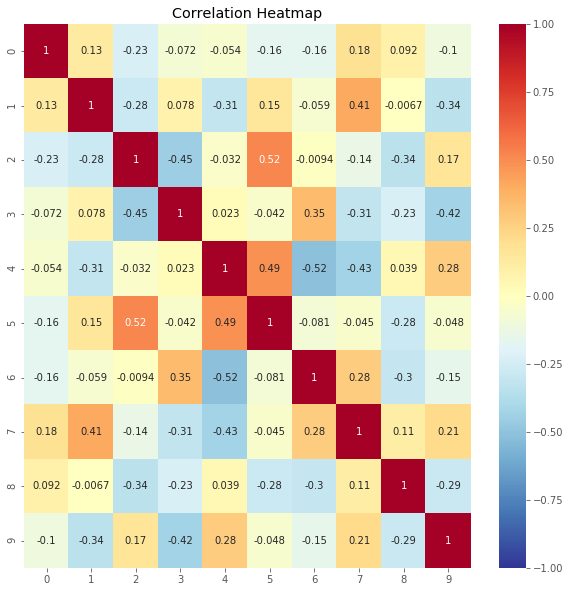

In [15]:
matrix = (np.random.random((10,10)) - 0.5) * 2
plt.figure(figsize=(10,10))
plt.title('Correlation Heatmap');
ext_data_corrs = pd.DataFrame(matrix).corr()
print(ext_data_corrs)
heatmap = sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -1, annot = True, vmax = +1)
plt.show()

[[ 0.77890867 -0.47690884 -0.30402768]
 [-0.04057989  0.19904218 -0.44045665]
 [-0.3249376  -0.20568864  0.35413009]
 ...
 [ 0.75784861 -0.37019465 -0.75407414]
 [ 0.65115026 -0.91057142 -0.48073836]
 [-0.92641072 -0.96331484  0.88660677]]


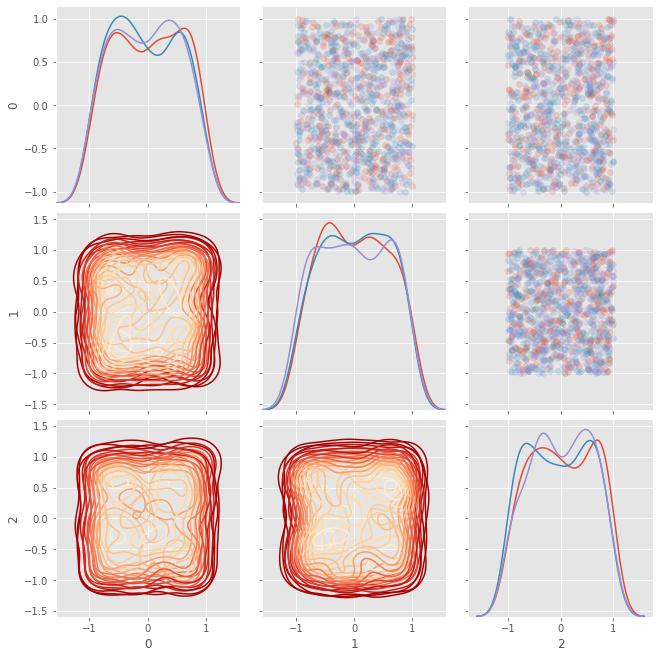

In [16]:
nrow = 1000
ncol = 3

matrix = (np.random.random((nrow,ncol)) - 0.5)*2
print(matrix)
# 隨機給予 0, 1, 2 三種標籤
indice = np.random.choice([0,1,2], size=nrow)
plot_data = pd.DataFrame(matrix, indice).reset_index()

# 繪製 seborn 進階 Heatmap
grid = sns.PairGrid(data = plot_data, size = 3, diag_sharey=False, 
                    hue = 'index', vars = [x for x in list(plot_data.columns) if x != 'index'])

grid.map_upper(plt.scatter , alpha = 0.2)
grid.map_diag(sns.kdeplot )
grid.map_lower(sns.kdeplot , cmap = plt.cm.OrRd_r)

plt.show()

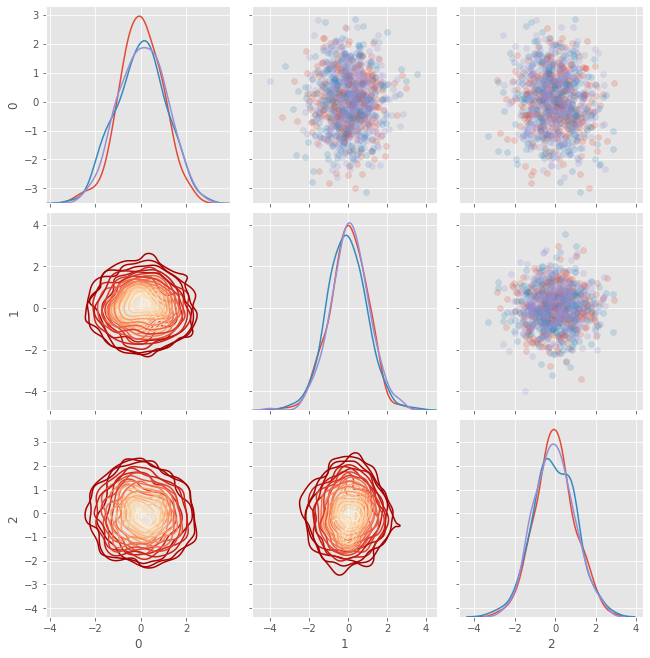

In [18]:
nrow = 1000
ncol = 3

matrix = np.random.randn(nrow * ncol).reshape((nrow, ncol))

# 隨機給予 0, 1, 2 三種標籤
indice = np.random.choice([0,1,2], size=nrow)
plot_data = pd.DataFrame(matrix, indice).reset_index()

# 繪製 seborn 進階 Heatmap
grid = sns.PairGrid(data = plot_data, size = 3, diag_sharey=False,
                    hue = 'index', vars = [x for x in list(plot_data.columns) if x != 'index'])

grid.map_upper(plt.scatter , alpha = 0.2)
grid.map_diag(sns.kdeplot)
grid.map_lower(sns.kdeplot , cmap = plt.cm.OrRd_r)

plt.show()